Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude



Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

Perform a weather check on each of the cities using a series of successive API calls.

Include a print log of each city as it's being processed with the city number and city name.

Save both a CSV of all data retrieved and png images for each scatter plot.


As final considerations:


You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.

You must include a written description of three observable trends based on the data.

You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.



In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)  #Generate Cities List


   # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

In [155]:
#api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=3b44a6bce40e8e38a09238fb9c5096d8
ii = 0

citydat = []
dat = {}
lati= []
clouds = []
temp = []
humid = []
wind = []

cityNotFound = 0
for city in cities:
    #time.sleep(1)

    #print(ii)
    reqString = f"http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_keys.weatherKey}"
    dat = requests.get(reqString)
    #Temperature (F) vs. Latitude
    #Humidity (%) vs. Latitude
    #Cloudiness (%) vs. Latitude
    #Wind Speed (mph) vs. Latitude
    #print(ii)
    citydat.append(dat.json())
    
    try:
        print(f"Grabbin' city data for city id: {citydat[ii]['id']} which is {citydat[ii]['name']}")
        lati.append(citydat[ii]['coord']['lat'])
        
    except:
        print(f"latitude for {city} not found!")
        print(citydat[ii])
        cityNotFound +=1
        print(f"cities not found: {cityNotFound} of {ii}")
        print(reqString)
        ii = ii + 1
        continue #skip all
    
    try:
        clouds.append(citydat[ii]['clouds']['all'])
    except:
        print(f"clouds for {city} not found!")
        clouds.append("unknown")
    
    try:
        humid.append(citydat[ii]['main']['humidity'])
    except:
        print(f"humidity for {city} not found!")
        clouds.append("unknown")
    
    try:
        t1 = citydat[ii]['main']['temp']
        t2 = (t1 - 273.15) * 9/5 + 32
        temp.append(t2)
    except:
        print(f"temp for {city} not found!")
        clouds.append("unknown")
    
    try:
        wind.append(citydat[ii]['wind']['speed'])
    except:
        print(f"Wind speed for {city} not found!")
        clouds.append("unknown")
    
    ii = ii + 1
print("======= DONE =======")    
#e = sys.exc_info()[0]

    

Grabbin' city data for city id: 4020109 which is Atuona
Grabbin' city data for city id: 2037485 which is Erenhot
Grabbin' city data for city id: 3352136 which is Windhoek
Grabbin' city data for city id: 3833367 which is Ushuaia
Grabbin' city data for city id: 5859699 which is College
Grabbin' city data for city id: 4407665 which is Kodiak
Grabbin' city data for city id: 3910343 which is Mineros
Grabbin' city data for city id: 4030556 which is Rikitea
Grabbin' city data for city id: 1162105 which is Zhob
Grabbin' city data for city id: 2015306 which is Tiksi
Grabbin' city data for city id: 1006984 which is East London
Grabbin' city data for city id: 3471451 which is Arraial do Cabo
Grabbin' city data for city id: 5880568 which is Bethel
Grabbin' city data for city id: 1106643 which is Quatre Cocos
Grabbin' city data for city id: 3378644 which is Georgetown
Grabbin' city data for city id: 2110227 which is Butaritari
Grabbin' city data for city id: 2075265 which is Busselton
Grabbin' city

Grabbin' city data for city id: 1337610 which is Thinadhoo
Grabbin' city data for city id: 2109528 which is Buala
Grabbin' city data for city id: 4196508 which is Malibu
Grabbin' city data for city id: 2538474 which is Rabat
Grabbin' city data for city id: 3441665 which is Minas
Grabbin' city data for city id: 1275719 which is Gopalpur
Grabbin' city data for city id: 1691355 which is Sabang
Grabbin' city data for city id: 3420768 which is Qasigiannguit
Grabbin' city data for city id: 1847947 which is Shingu
Grabbin' city data for city id: 1014034 which is Carnarvon
Grabbin' city data for city id: 6111862 which is Port Hardy
Grabbin' city data for city id: 364933 which is Umm Kaddadah
Grabbin' city data for city id: 2517595 which is Fuengirola
Grabbin' city data for city id: 3382160 which is Cayenne
Grabbin' city data for city id: 1859964 which is Kaseda
Grabbin' city data for city id: 1507390 which is Dikson
Grabbin' city data for city id: 1490796 which is Strezhevoy
Grabbin' city data

Grabbin' city data for city id: 2446796 which is Bilma
Grabbin' city data for city id: 415189 which is Aden
Grabbin' city data for city id: 3380290 which is Sinnamary
Grabbin' city data for city id: 470676 which is Vyazma
Grabbin' city data for city id: 5384339 which is Port Hueneme
Grabbin' city data for city id: 1229901 which is Polonnaruwa
Grabbin' city data for city id: 3515753 which is Tetelzingo
Grabbin' city data for city id: 2014078 which is Urusha
Grabbin' city data for city id: 5866063 which is Kenai
Grabbin' city data for city id: 2171722 which is Charters Towers
Grabbin' city data for city id: 2055868 which is Yantal
Grabbin' city data for city id: 3523466 which is Matamoros
Grabbin' city data for city id: 3395981 which is Maceio
Grabbin' city data for city id: 3527413 which is Graciano Sanchez
Grabbin' city data for city id: 3037456 which is Saint-Joseph
Grabbin' city data for city id: 6050066 which is La Ronge
Grabbin' city data for city id: 913323 which is Kaoma
Grabbin'

Grabbin' city data for city id: 6071876 which is Melfort
Grabbin' city data for city id: 1024552 which is Xai-Xai
Grabbin' city data for city id: 1641899 which is Labuhan
Grabbin' city data for city id: 3995142 which is Naica
Grabbin' city data for city id: 2647984 which is Great Yarmouth
Grabbin' city data for city id: 4568138 which is San Juan
Grabbin' city data for city id: 1248991 which is Colombo
Grabbin' city data for city id: 4031574 which is Provideniya
Grabbin' city data for city id: 3450288 which is Santa Cruz Cabralia
Grabbin' city data for city id: 3128174 which is Bermeo
Grabbin' city data for city id: 1644932 which is Ende
Grabbin' city data for city id: 2214827 which is Mizdah
Grabbin' city data for city id: 3372760 which is Praia da Vitoria
Grabbin' city data for city id: 3359638 which is Walvis Bay
Grabbin' city data for city id: 2654728 which is Bridlington
Grabbin' city data for city id: 1254046 which is Tura
Grabbin' city data for city id: 461442 which is Ape
Grabbi

In [159]:
#citydat
#check for equal data sizes
print(len(lati))
print(len(wind))
print(len(temp))
print(len(humid))
print(len(clouds))

535
535
535
535
535


In [160]:
#make pandas
cl = pd.DataFrame({'Clouds':clouds, 'Latitude':lati}) #
wi = pd.DataFrame({'Wind Speed':wind, 'Latitude':lati})
hu = pd.DataFrame({'Humidity':humid, 'Latitude':lati})
te = pd.DataFrame({'Temperature (f)':temp, 'Latitude':lati})
#wind

In [161]:
te.head()

,Latitude,Temperature (f)
0,-9.80,80.303
1,43.65,25.853
2,-22.57,79.376
3,-54.81,56.840
4,64.86,-3.496


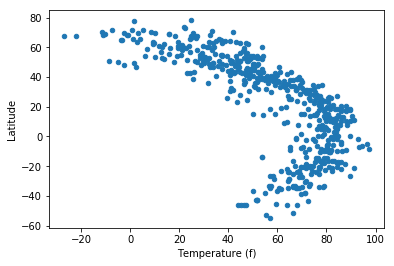

In [162]:
#x = te.plot.scatter('clouds', 'lat')
te.plot(kind='scatter', x='Temperature (f)', y='Latitude')
plt.savefig('temp.jpg')
te.to_csv("temp.csv")
plt.show()

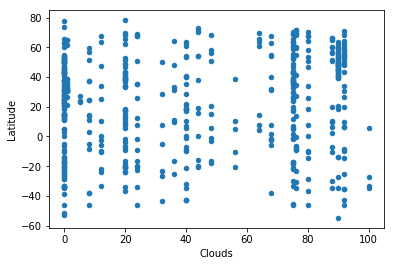

In [163]:
cl.plot(kind='scatter', x='Clouds', y='Latitude')
plt.savefig('clouds.jpg')
cl.to_csv("clouds.csv")
plt.show()

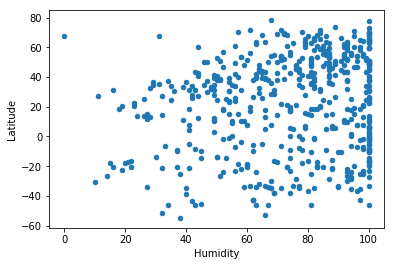

In [164]:
hu.plot(kind='scatter', x='Humidity', y='Latitude')
plt.savefig('humidity.jpg')
hu.to_csv("humidity.csv")
plt.show()

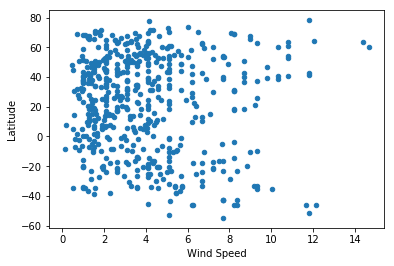

In [165]:
wi.plot(kind='scatter', x='Wind Speed', y='Latitude')
plt.savefig('wind.jpg')
wi.to_csv("wind.csv")
plt.show()